In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
# imports
import csv
from matplotlib import pyplot as plt
import numpy as np
import pylab
from collections import namedtuple

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Stance Affect Analysis

In this notebook, we will analyze the relationships between stance and affect seen in the Twitter corpus.

In [4]:
# Load the data
def load_tweet_affect(fstream):
    reader = csv.reader(fstream, delimiter="\t")
    header = next(reader)
    print(header)
    assert header == ["tweet_id", "hc", "bs", "dt", "tc", "valence", "arousal", "dominance"]
    return np.array([[float(i) for i in row] for row in reader])

def load_user_affect(fstream):
    reader = csv.reader(fstream, delimiter="\t")
    header = next(reader)
    print(header)
    assert header == ["user_id", "hc", "bs", "dt", "tc", "count", "valence", "arousal", "dominance"]
    return np.array([[float(i) for i in row] for row in reader])
    
with open('data/twit_stance_affect.tsv') as f:
    tweet_affect = load_tweet_affect(f)
with open('data/twit_user_stance_affect.tsv') as f:
    user_affect = load_user_affect(f)

FIELD_MAP = {key:i for i, key in enumerate(["id", "hc", "bs", "dt", "tc", "valence", "arousal", "dominance"])}
USER_FIELD_MAP = {key:i for i, key in enumerate(["id", "hc", "bs", "dt", "tc", "count", "valence", "arousal", "dominance"])}

['tweet_id', 'hc', 'bs', 'dt', 'tc', 'valence', 'arousal', 'dominance']
['user_id', 'hc', 'bs', 'dt', 'tc', 'count', 'valence', 'arousal', 'dominance']


In [14]:
USER_FIELD_MAP = {key:i for i, key in enumerate(["id", "hc", "bs", "dt", "tc", "count", "valence", "arousal", "dominance"])}

In [5]:
CANDIDATES = ['hc', 'bs', 'dt',] # 'tc']
AXES = ['valence', 'arousal', 'dominance']

candidate:  hc axis:  valence
y=0.601771x+(5.583390)
candidate:  hc axis:  arousal
y=-0.346631x+(4.022789)
candidate:  hc axis:  dominance
y=0.758182x+(5.687886)
candidate:  bs axis:  valence
y=0.388010x+(5.436923)
candidate:  bs axis:  arousal
y=0.151923x+(4.030633)
candidate:  bs axis:  dominance
y=0.106813x+(5.581223)
candidate:  dt axis:  valence
y=0.317456x+(5.530841)
candidate:  dt axis:  arousal
y=0.093337x+(4.065960)
candidate:  dt axis:  dominance
y=0.078113x+(5.606644)


/home/chaganty/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


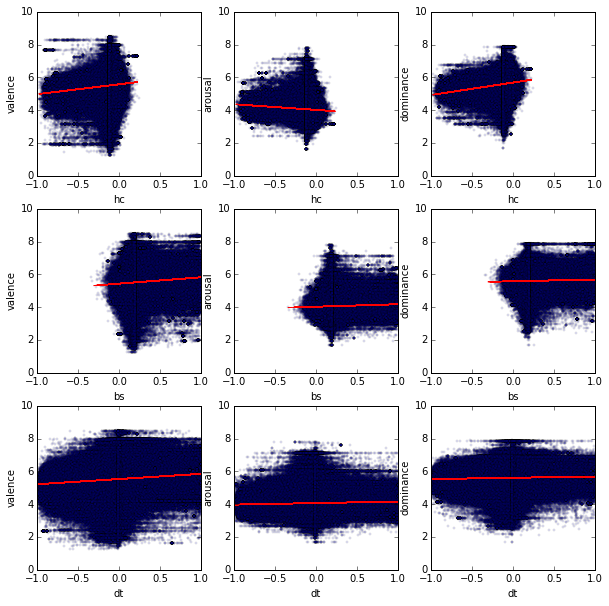

In [10]:
# Plot tweet affect
for i, candidate in enumerate(CANDIDATES):
    for j, axis in enumerate(AXES):
        print("candidate: ", candidate, "axis: ", axis)
        plt.subplot(len(CANDIDATES), len(AXES), i * len(AXES) + j + 1)
        X, Y = tweet_affect.T[FIELD_MAP[candidate]], tweet_affect.T[FIELD_MAP[axis]]
        z = np.polyfit(X, Y, 1)
        p = np.poly1d(z)
        print("y=%.6fx+(%.6f)"%(z[0],z[1]))
        
        plt.scatter(X, Y, s=4, alpha=0.1)
        plt.xlabel(candidate)
        plt.ylabel(axis)     
        plt.xlim(-1,1)
        plt.ylim(0,10)
        pylab.plot(X,p(X),"r--")
        # the line equation:
plt.savefig('tweet_stance_affect.png')        
plt.show()

candidate:  hc axis:  valence
y=0.079676x+(5.570146)
candidate:  hc axis:  arousal
y=-0.640940x+(4.011236)
candidate:  hc axis:  dominance
y=0.924172x+(5.714454)
candidate:  bs axis:  valence
y=0.578068x+(5.443734)
candidate:  bs axis:  arousal
y=0.181960x+(4.045989)
candidate:  bs axis:  dominance
y=0.181484x+(5.574131)
candidate:  dt axis:  valence
y=0.416500x+(5.587954)
candidate:  dt axis:  arousal
y=0.112908x+(4.090218)
candidate:  dt axis:  dominance
y=0.102640x+(5.617604)


/home/chaganty/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


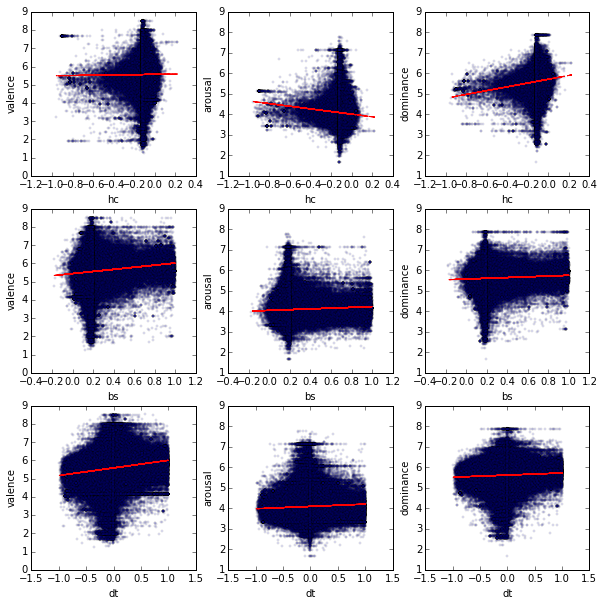

In [15]:
# Plot tweet affect
for i, candidate in enumerate(CANDIDATES):
    for j, axis in enumerate(AXES):
        print("candidate: ", candidate, "axis: ", axis)
        plt.subplot(len(CANDIDATES), len(AXES), i * len(AXES) + j + 1)
        X, Y = user_affect.T[USER_FIELD_MAP[candidate]], user_affect.T[USER_FIELD_MAP[axis]]
        z = np.polyfit(X, Y, 1)
        p = np.poly1d(z)
        print("y=%.6fx+(%.6f)"%(z[0],z[1]))
        plt.xlabel(candidate)
        plt.ylabel(axis)     
        #plt.xlim(-1,1)
        #plt.ylim(0,10)
        plt.scatter(X, Y, s=4, alpha=0.1)
        pylab.plot(X,p(X),"r--")
        # the line equation:
plt.savefig('user_stance_affect.png')        
plt.show()